Initial Grid:
0 0 0 0 0 
- - - - - 
0 0 1 0 0 
- - - - - 
0 0 1 1 0 
- - - - - 
0 1 1 0 0 
- - - - - 
0 0 0 0 0 
- - - - - 

Updated Grid:
0 0 0 0 0 
- - - - - 
0 0 1 1 0 
- - - - - 
0 0 0 1 0 
- - - - - 
0 1 1 1 0 
- - - - - 
0 0 0 0 0 
- - - - - 

Grid after 5 steps:
0 0 0 0 0 
- - - - - 
0 0 1 1 0 
- - - - - 
1 1 0 0 1 
- - - - - 
1 1 0 1 1 
- - - - - 
0 1 1 1 0 
- - - - - 


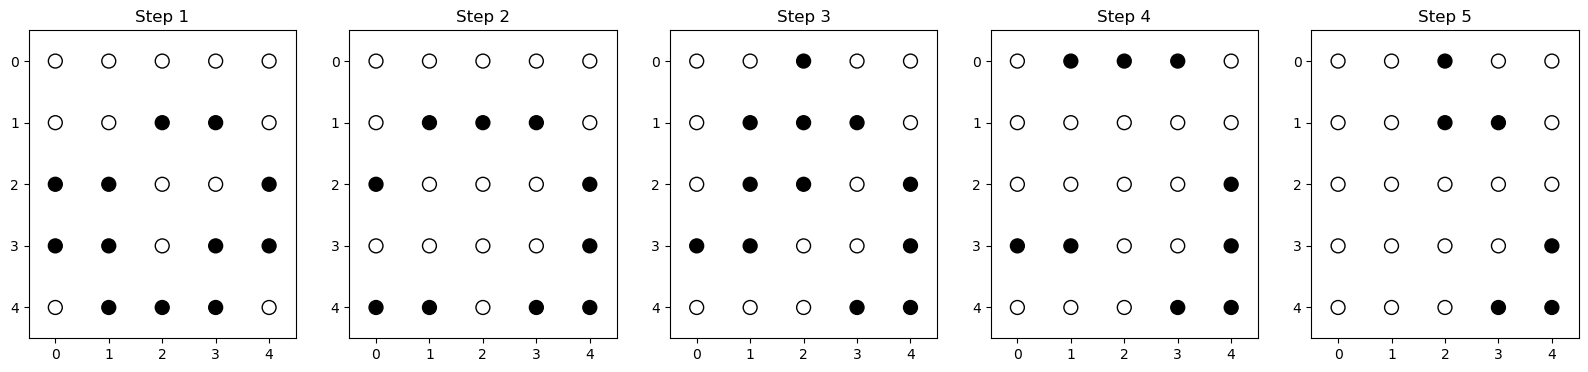

In [4]:
import matplotlib.pyplot as plt

class GameOfLife:
    def __init__(self, x_dim, y_dim):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.life_grid = [[0] * y_dim for _ in range(x_dim)]

    def get_grid(self):
        return self.life_grid

    def print_grid(self):
        for row in self.life_grid:
            for cell in row:
                print(cell, end=' ')
            print()  # Move to the next line after printing all cells in a row
            print('- ' * self.y_dim)  # Print row separator

    def populate_grid(self, coord):
        for row, col in coord:
            self.life_grid[row][col] = 1
        return self.life_grid

    def make_step(self):
        # Initialize sum_grid with zeros
        sum_grid = [[0] * self.y_dim for _ in range(self.x_dim)]
        
        # Loop through each cell
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                # Loop through its neighbors
                for a in range(max(0, i - 1), min(self.x_dim, i + 2)):
                    for b in range(max(0, j - 1), min(self.y_dim, j + 2)):
                        # Exclude the cell itself
                        if (a, b) != (i, j):
                            sum_grid[i][j] += self.life_grid[a][b]
        
        # Update the cells based on Game of Life rules
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                if self.life_grid[i][j] == 1:  # If the cell is alive
                    if sum_grid[i][j] < 2 or sum_grid[i][j] > 3:
                        self.life_grid[i][j] = 0  # Cell dies due to underpopulation or overpopulation
                else:  # If the cell is dead
                    if sum_grid[i][j] == 3:
                        self.life_grid[i][j] = 1  # Cell becomes alive due to reproduction
        
        return self.life_grid
    
    def make_n_steps(self, n):
        for _ in range(n):
            self.make_step()
        return self.life_grid
    
    def draw_grid(self):
        # Initialize lists for x and y coordinates
        x = []
        y = []

        # Fill the coordinate arrays
        for i in range(self.y_dim):
            for j in range(self.x_dim):
                x.append(j)
                y.append(i)

        # Set up the plot
        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 4))

        # Make steps and draw grids for the first 5 steps
        for i in range(5):
            # Draw the scatter plot
            ax[i].scatter(x, y, c=self.life_grid, cmap='binary', s=100, edgecolors='black')

            # Set the limits of the plot and invert the y axis
            ax[i].set_xlim(-0.5, self.x_dim - 0.5)
            ax[i].set_ylim(-0.5, self.y_dim - 0.5)
            ax[i].invert_yaxis()

            # Title for each step
            ax[i].set_title(f'Step {i+1}')

            # Make a step
            self.make_step()

        # Show the plot
        plt.show()

# Example usage:
x_dim = 5  # Example dimension in the x-direction
y_dim = 5  # Example dimension in the y-direction
game = GameOfLife(x_dim, y_dim)

# Coordinates of cells to be marked as 'alive'
coordinates = [(1, 2), (2, 2), (2, 3), (3, 1), (3, 2)]

# Populate the grid with the specified coordinates
game.populate_grid(coordinates)

# Print the initial grid
print("Initial Grid:")
game.print_grid()

# Make one step
game.make_step()

# Print the updated grid
print("\nUpdated Grid:")
game.print_grid()

game.make_n_steps(5)

print("\nGrid after 5 steps:")
game.print_grid()

game.draw_grid()